# HSV Color Space, Balloons

### Import resources and display image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


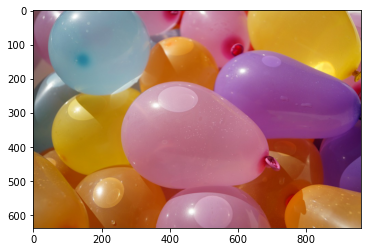

In [3]:
%matplotlib inline

# Read in the image
image = cv.imread('images/water_balloons.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image = cv.cvtColor(image_copy, cv.COLOR_BGR2RGB)

plt.imshow(image)

### Plot color channels

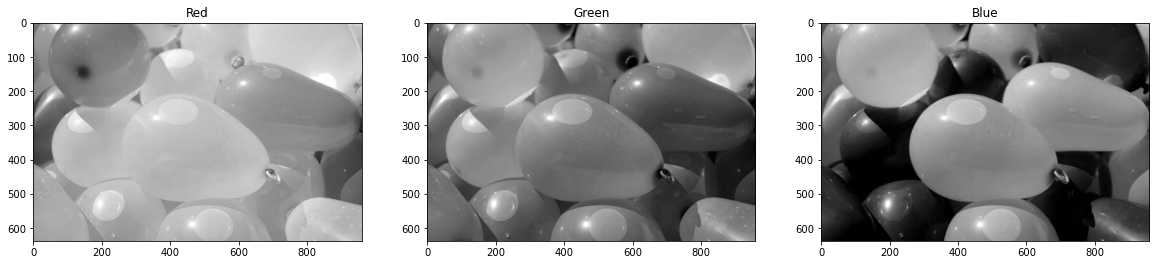

In [4]:
# RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')


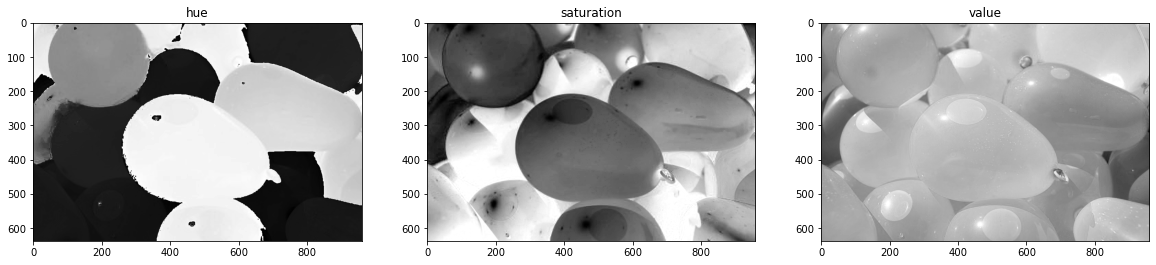

In [6]:
# Convert from RGB to HSV
img_hsv = cv.cvtColor(image_copy, cv.COLOR_BGR2HSV)

# HSV channels
h = img_hsv[:, :, 0]
s = img_hsv[:, :, 1]
v = img_hsv[:, :, 2]

figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

ax1.set_title('hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('value')
ax3.imshow(v, cmap='gray')

### Define pink and hue selection thresholds

In [7]:
# Define our color selection criteria in HSV values
lower_hue = np.array([160,0,0]) 
upper_hue = np.array([180,255,255])


In [8]:
# Define our color selection criteria in RGB values
lower_pink = np.array([180,0,100]) 
upper_pink = np.array([255,255,230])

### Mask the image 

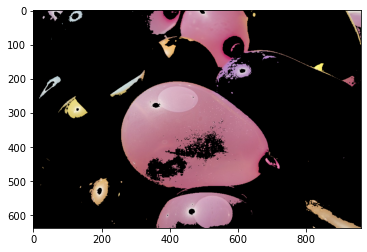

In [9]:
# Define the masked area in RGB space
mask_rgb = cv.inRange(image, lower_pink, upper_pink)

# mask the image
masked_image = np.copy(image)
masked_image[mask_rgb==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)

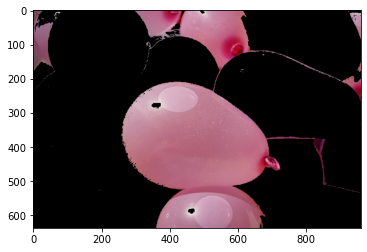

In [10]:
# Now try HSV!

# Define the masked area in HSV space
mask_hsv = cv.inRange(img_hsv,lower_hue, upper_hue)
# mask the image
image[mask_hsv == 0] = [0, 0, 0]

# Vizualize the mask
plt.imshow(image)
